Question 1

In [73]:
import numpy as np

# Define the roll, translation, and yaw angles in radians
roll_angle = np.deg2rad(30)
translation_x = 10
yaw_angle = np.deg2rad(10)

# Calculate the roll transformation matrix
roll_matrix = np.array([[np.cos(roll_angle), 0, np.sin(roll_angle), 0],
                        [0, 1, 0, 0],
                        [-np.sin(roll_angle), 0, np.cos(roll_angle), 0],
                        [0, 0, 0, 1]])

# Calculate the translation transformation matrix
translation_matrix = np.array([[1, 0, 0, translation_x],
                               [0, 1, 0, 0],
                               [0, 0, 1, 0],
                               [0, 0, 0, 1]])

# Calculate the yaw transformation matrix
yaw_matrix = np.array([[np.cos(yaw_angle), -np.sin(yaw_angle), 0, 0],
                       [np.sin(yaw_angle), np.cos(yaw_angle), 0, 0],
                       [0, 0, 1, 0],
                       [0, 0, 0, 1]])

# Combine the transformation matrices into an affine transformation matrix
affine_matrix = translation_matrix @ roll_matrix @ yaw_matrix

print(affine_matrix)


[[ 0.85286853 -0.15038373  0.5        10.        ]
 [ 0.17364818  0.98480775  0.          0.        ]
 [-0.49240388  0.08682409  0.8660254   0.        ]
 [ 0.          0.          0.          1.        ]]


In [7]:
import numpy as np
from numpy import sin, cos

beta = np.deg2rad(30)
gamma = np.deg2rad(10)

roll = np.array([[cos(beta), 0, sin(beta), 0],
                   [0, 1, 0, 0],
                   [- sin(beta), 0, cos(beta), 0],
                   [0, 0, 0, 1]])

translate = np.array([[1, 0, 0, 10],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])

yaw = np.array([[cos(gamma), -sin(gamma), 0, 0],
                [sin(gamma), cos(gamma), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

result = (roll @ yaw)

print(translate @ result)


[[ 0.85286853 -0.15038373  0.5        10.        ]
 [ 0.17364818  0.98480775  0.          0.        ]
 [-0.49240388  0.08682409  0.8660254   0.        ]
 [ 0.          0.          0.          1.        ]]


Question 2

In [78]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

glass_data = np.loadtxt('glass_data.txt', comments="%")
x = glass_data[0:213, 0:8]

glass_df = pd.DataFrame(glass_data)

# Subtract the mean from the data
data_mean = np.mean(x, axis=0)
data = x - data_mean

# Subtract the mean from the data
data_mean = np.mean(x, axis=0)
data = x - data_mean

# Compute the minimum and maximum value of each measurement
min_values = np.min(data, axis=0)
max_values = np.max(data, axis=0)

# Divide each measurement by the difference between the maximum and minimum value
diff_values = max_values - min_values
normalized_data = data / diff_values

# Compute the diagonal matrix at position (0, 0) of the covariance matrix
covariance_matrix = np.cov(normalized_data.T)
diagonal_value = covariance_matrix[0, 0]

print(diagonal_value)

0.017841718971039092


Page 3

In [113]:
print(normalized_data[0])

[ 0.11583343  0.03549013  0.39930153 -0.10651866 -0.15492958 -0.07075518
 -0.01938147 -0.05334228]


Page 4

In [87]:
# Perform PCA analysis
pca = PCA(n_components=8)
pca.fit(normalized_data)

# Project the data onto the principal components
projected_data = pca.transform(normalized_data)

# Compute the absolute values of the projected data
absolute_values = np.abs(projected_data)

# Find the maximum absolute value
max_absolute_value = np.max(absolute_values)

print(max_absolute_value)

1.0324517383837803


Page 5

In [82]:
explained_variance_ratio = pca.explained_variance_ratio_
total_variation = np.sum(explained_variance_ratio[:3])
total_variation_percentage = total_variation * 100

print(f"The first three components explain {total_variation_percentage:.2f}% of the total variation.")

The first three components explain 83.09% of the total variation.


Page 6

0.49019607843137253
The number of foreground pixels in the eroded image is: 36073


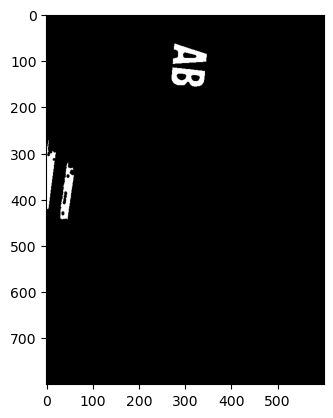

In [93]:
import cv2
from skimage.filters import median
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.measure import label, regionprops
from skimage import measure
import matplotlib.pyplot as plt


def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img

def apply_erosion(binary, disk_sz):
    footprint = disk(disk_sz)
    eroded = erosion(binary, footprint)
    return eroded

########### Question | 1 ##############

# Read the image
image = cv2.imread('Letters.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median filter with a square footprint of size 8
filtered = apply_median_filter(gray, size = 8)

# Get the value at pixel (100, 100) in the resulting image
pixel_value = filtered[100, 100] / 255

print(pixel_value)

########### Question | 2 ##############

# Extract the B, G, R color channels from the image
B, G, R = cv2.split(image)

# Create a binary image based on the condition
binary_image = np.zeros_like(R)
binary_image[(R > 100) & (G < 100) & (B < 100)] = 1

# Define the structuring element for erosion
radius = 3

# Erode the binary image
eroded_image = apply_erosion(binary_image, radius)

# Count the number of foreground pixels in the eroded image
foreground_pixels = np.sum(eroded_image)

print(f"The number of foreground pixels in the eroded image is: {foreground_pixels}")

########### Question | 3 ##############

# Extract all BLOBs in the binary image
label_image = label(eroded_image)
blobs = regionprops(label_image)

min_area = 1000 
max_area = 4000
max_perimeter = 300

# Remove BLOBs with area or perimeter outside the specified range
label_img_filter = label_image.copy()
for region in blobs:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area or region.perimeter < max_perimeter:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
estimated_liver_binary = label_img_filter > 0
plt.imshow(estimated_liver_binary, cmap='gray')
plt.show() 



Page 7

In [96]:
import cv2
from skimage import color

# Load the background and new frame images
background = cv2.imread('background.png', cv2.COLOR_BGR2RGB)
new_frame = cv2.imread('new_frame.png', cv2.COLOR_BGR2RGB)

# Convert both images to grayscale
background_gray = color.rgb2gray(background)
new_frame_gray = color.rgb2gray(new_frame)

# Update the background image using alpha blending
alpha = 0.90
new_background = alpha * background_gray + (1 - alpha) * new_frame_gray

# Compute the absolute difference image
diff_image = abs(new_frame_gray - new_background)

average_value = np.mean(new_background[150:200, 150:200])
print(f"The average value of the estimated new background image in the pixel region [150:200, 150:200] is: {average_value}")

# Count the number of pixels with a value above 0.1
changed_pixels = (diff_image > 0.1).sum()

print(f"The number of changed pixels is: {changed_pixels}")


The average value of the estimated new background image in the pixel region [150:200, 150:200] is: 0.5977968741490196
The number of changed pixels is: 25643


Page 8

In [110]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Define the path to the training images folder
training_folder = 'training'

# Get the list of image file names in the training folder
image_files = os.listdir(training_folder)

# Load the first image to get the image shape
first_image = cv2.imread(os.path.join(training_folder, image_files[0]))
image_shape = first_image.shape

# Initialize an array to store the flattened image data
image_data = np.zeros((len(image_files), image_shape[0] * image_shape[1] * image_shape[2]))

# Load and flatten each image
for i, image_file in enumerate(image_files):
    image = cv2.imread(os.path.join(training_folder, image_file))
    flattened_image = image.flatten()
    image_data[i] = flattened_image

# Compute the average pizza
average_pizza = np.mean(image_data, axis=0)

# Perform PCA on the image data
pca = PCA(n_components=5)
pca.fit(image_data)

# Get the principal components
principal_components = pca.components_

explained_variance_ratio = pca.explained_variance_ratio_
first_component_variation = explained_variance_ratio[0] * 100

print(f"The first principal component explains {first_component_variation:.2f}% of the total variation.")

########### Question | 2 ##############

# Calculate the sum of squared differences between each pizza and the average pizza
squared_diffs = np.sum((image_data - average_pizza) ** 2, axis=1)

# Find the index of the pizza with the largest sum of squared differences
max_diff_index = np.argmax(squared_diffs)

# Get the file name of the pizza with the largest sum of squared differences
pizza_to_serve = image_files[max_diff_index]

print(f"The pizza to serve for your friend is: {pizza_to_serve}")

########### Question | 3 ##############

# Load the photo of the wanted pizza
wanted_pizza = cv2.imread('super_pizza.png')

# Flatten the photo of the wanted pizza
flattened_wanted_pizza = wanted_pizza.flatten()

# Calculate the sum of squared differences between each pizza and the average pizza
squared_diffs = np.sum((image_data - flattened_wanted_pizza) ** 2, axis=1)

# Find the index of the menu pizza with the smallest squared difference
closest_pizza_index = np.argmin(squared_diffs)

# Get the file name of the closest menu pizza
closest_pizza = image_files[closest_pizza_index]

print(f"The pizza on the PizzAI menu that looks most similar to the photo of the wanted pizza is: {closest_pizza}")

########### Question | 4 ##############

# Project all pizzas onto the PCA space
projected_pizzas = pca.transform(image_data)

# Calculate the distances between the projected pizzas and the origin (0, 0) in the PCA space
distances = np.linalg.norm(projected_pizzas[:0], axis=1)

# Find the indices of the pizzas with the largest positive and negative distances
max_positive_index = np.argmax(projected_pizzas[:, 0])
max_negative_index = np.argmin(projected_pizzas[:, 0])

# Get the file names of the signature pizzas
signature_pizza_positive = image_files[max_positive_index]
signature_pizza_negative = image_files[max_negative_index]

print(f"The signature pizzas are: {signature_pizza_positive} and {signature_pizza_negative}")


The first principal component explains 23.08% of the total variation.
The pizza to serve for your friend is: BigSausage.png
The pizza on the PizzAI menu that looks most similar to the photo of the wanted pizza is: Leafy.png
The signature pizzas are: BigSausage.png and FindTheOlives.png


Page 9

107.45075421472937 107.56182572614108
51.7968823111612 100.87099317992372


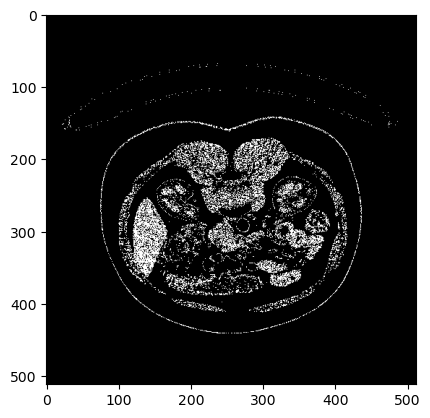

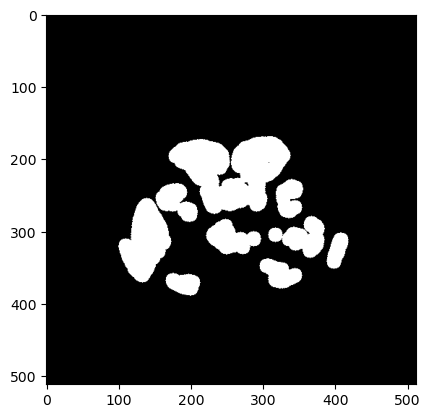

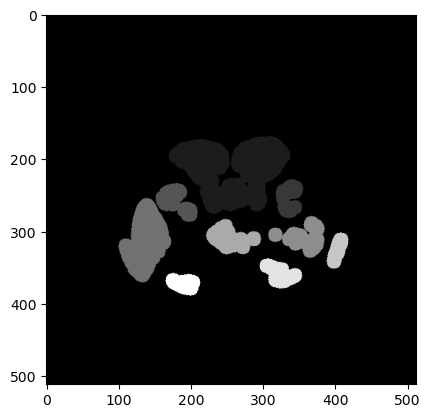

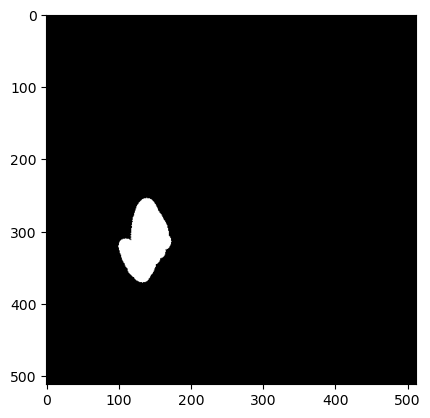

The DICE score between the estimated liver and the ground truth liver is: 0.782588123964987


In [72]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
from skimage.morphology import disk, binary_dilation, binary_erosion
import pydicom as dicom

# Read the DICOM file
ct = dicom.read_file('1-166.dcm')
image = ct.pixel_array

# Read the expert annotations
liver_roi_file = 'LiverROI.png'
kidney_roi_l_file = 'KidneyRoi_l.png'
kidney_roi_r_file = 'KidneyRoi_r.png'

liver_roi = cv2.imread(liver_roi_file, cv2.IMREAD_GRAYSCALE)
kidney_roi_l = cv2.imread(kidney_roi_l_file, cv2.IMREAD_GRAYSCALE)
kidney_roi_r = cv2.imread(kidney_roi_r_file, cv2.IMREAD_GRAYSCALE)

# Extract the pixel values of the liver, left kidney, and right kidney
liver_pixels = image[liver_roi > 0]
kidney_l_pixels = image[kidney_roi_l > 0]
kidney_r_pixels = image[kidney_roi_r > 0]

# Compute the average Hounsfield unit value in the left and right kidney
kidney_l_avg = np.mean(kidney_l_pixels)
kidney_r_avg = np.mean(kidney_r_pixels)

# Compute the average and standard deviation of the Hounsfield units in the liver
liver_avg = np.mean(liver_pixels)
liver_std = np.std(liver_pixels)

# Compute the threshold for the liver
t_1 = liver_avg - liver_std
t_2 = liver_avg + liver_std

print(kidney_l_avg, kidney_r_avg)

print(t_1, t_2)

# Create a binary image by thresholding the liver pixels
binary_image = np.zeros_like(image)
binary_image[(image >= t_1) & (image <= t_2)] = 1
plt.imshow(binary_image, cmap='gray')
plt.show() 

# Dilate the binary image
dilated_image = binary_dilation(binary_image, footprint=disk(radius=3))

# Erode the binary image
eroded_image = binary_erosion(dilated_image, footprint=disk(radius=10))

# Dilate the binary image again
dilated_image = binary_dilation(eroded_image, footprint=disk(radius=10))

plt.imshow(dilated_image, cmap='gray')
plt.show() 

# Extract all BLOBs in the binary image
label_image = label(dilated_image)
blobs = regionprops(label_image)
plt.imshow(label_image, cmap='gray')
plt.show() 

# Remove BLOBs with area or perimeter outside the specified range
label_img_filter = label_image.copy()
for region in blobs:
	# Find the areas that do not fit our criteria
	if region.area > 7000 or region.area < 1500 or region.perimeter < 300:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
estimated_liver_binary = label_img_filter > 0
plt.imshow(estimated_liver_binary, cmap='gray')
plt.show() 

# Compute the DICE score between the estimated liver and the ground truth liver
ground_truth_liver = cv2.imread(liver_roi_file, cv2.IMREAD_GRAYSCALE)
ground_truth_liver_binary = np.zeros_like(ground_truth_liver)
ground_truth_liver_binary[ground_truth_liver > 0] = 1

intersection = np.logical_and(ground_truth_liver_binary, estimated_liver_binary)
dice_score = 2 * intersection.sum() / (ground_truth_liver_binary.sum() + estimated_liver_binary.sum())

print(f"The DICE score between the estimated liver and the ground truth liver is: {dice_score}")


Page 10

Page 11

In [54]:
import cv2
import numpy as np
from skimage.transform import SimilarityTransform, EuclideanTransform
from skimage.transform import matrix_transform
from skimage.util import img_as_float, img_as_ubyte
from skimage.transform import warp

# Load the source and destination images
source_image = cv2.imread('shoe_1.png')
destination_image = cv2.imread('shoe_2.png')

# Define the manually placed landmarks on the source and destination images
src = np.array([[40, 320], [425, 120], [740, 330]])
dst = np.array([[80, 320], [380, 155], [670, 300]])


e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f_before = error_x + error_y

# Compute the similarity transform using the landmarks
tform = SimilarityTransform()
# tform = EuclideanTransform()

tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)

found_scale = tform.scale
print(f"Found scale of the transform: {found_scale}")

warped = warp(source_image, tform.inverse)

e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f_after = error_x + error_y
print(f"Landmark alignment error F: {f_before - f_after}")

# Convert the transformed image and destination image to bytes
transformed_image_bytes = img_as_ubyte(warped)
destination_image_bytes = img_as_ubyte(destination_image)

# Extract the blue component values at position (200, 200)
transformed_blue = transformed_image_bytes[200, 200, 0]
destination_blue = destination_image_bytes[200, 200, 0]

print(transformed_blue, destination_blue)

# Calculate the absolute difference
absolute_difference = abs(destination_blue - transformed_blue)

print(f"The absolute difference between the blue component values is: {absolute_difference}")



Found scale of the transform: 0.8327055808649095
Landmark alignment error F: 10276.982291730053
113 139
The absolute difference between the blue component values is: 26


Page 12

In [26]:
import cv2
import numpy as np

# Load the image
filename = 'lights.png'
image = cv2.imread(filename)

# Rotate the image by 11 degrees with a rotation center of (40, 40)
rows, cols = image.shape[:2]
M = cv2.getRotationMatrix2D((40, 40), 11, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

# Convert the image to grayscale
gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Compute the automatic threshold using Otsu's method
threshold, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Compute the percentage of foreground pixels
foreground_pixels = np.count_nonzero(binary_image)
total_pixels = binary_image.size
percentage_foreground = (foreground_pixels / total_pixels) * 100

print(f"The percentage of foreground pixels is: {percentage_foreground:.2f}%")

print(f"The threshold value is: {threshold/255}")

The percentage of foreground pixels is: 25.42%
The threshold value is: 0.4196078431372549


Page 13

(461, 600, 3)
The number of foreground pixels in the binary image is: 120710


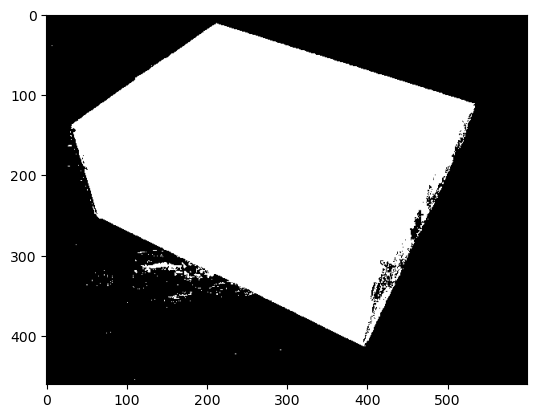

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


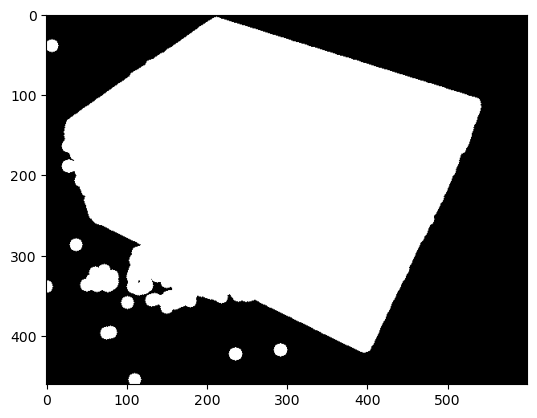

The number of foreground pixels in the resulting image is: 141749


In [111]:
import cv2
import numpy as np
from skimage.morphology import dilation
from skimage.morphology import disk 
import matplotlib.pyplot as plt

def apply_dilation(binary, disk_sz):
    footprint = disk(disk_sz)
    dilated = dilation(binary, footprint)
    return dilated

# Load the input image
filename = 'nike.png'
image = cv2.imread(filename)
print(image.shape)

# Convert the image from RGB to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extract the H component of the HSV image
h_component = hsv_image[:, :, 0] / 179

# Create a binary image by setting pixels with H value between 0.3 and 0.7 to 1, and the rest to 0
_, binary_image = cv2.threshold(h_component, 0.3, 0.7, cv2.THRESH_BINARY)
foreground_pixels = np.count_nonzero(binary_image)

print(f"The number of foreground pixels in the binary image is: {foreground_pixels}")

# # Display the resulting image
plt.imshow(binary_image, cmap='gray')
plt.show()

# # Perform morphological dilation with a disk-shaped structuring element with radius=8
dilated_image = apply_dilation(binary_image, disk_sz=8)
print(dilated_image)

# # Display the resulting image
plt.imshow(dilated_image, cmap='gray')
plt.show()

foreground_pixels = np.count_nonzero(dilated_image)

print(f"The number of foreground pixels in the resulting image is: {foreground_pixels}")

